<a href="https://colab.research.google.com/github/reemahs-pro/Ml-task-2/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research &

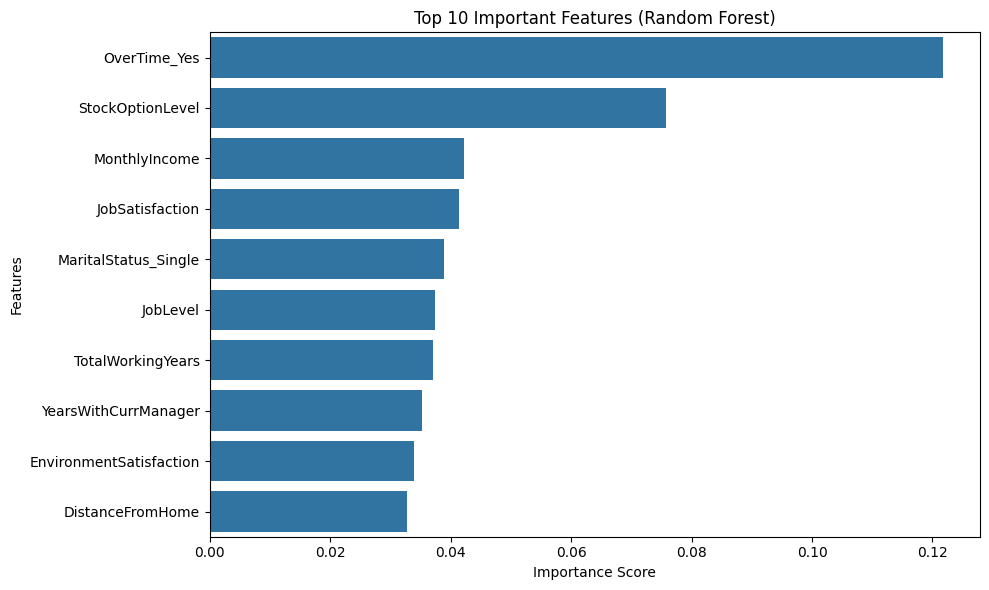

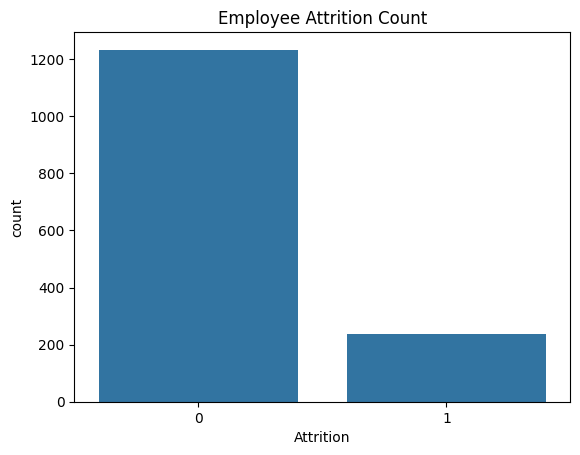

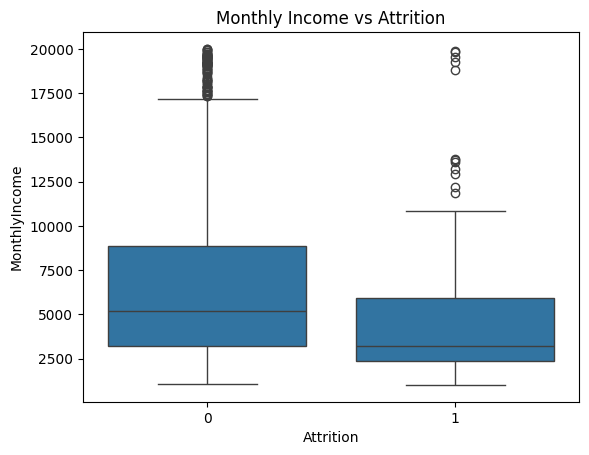

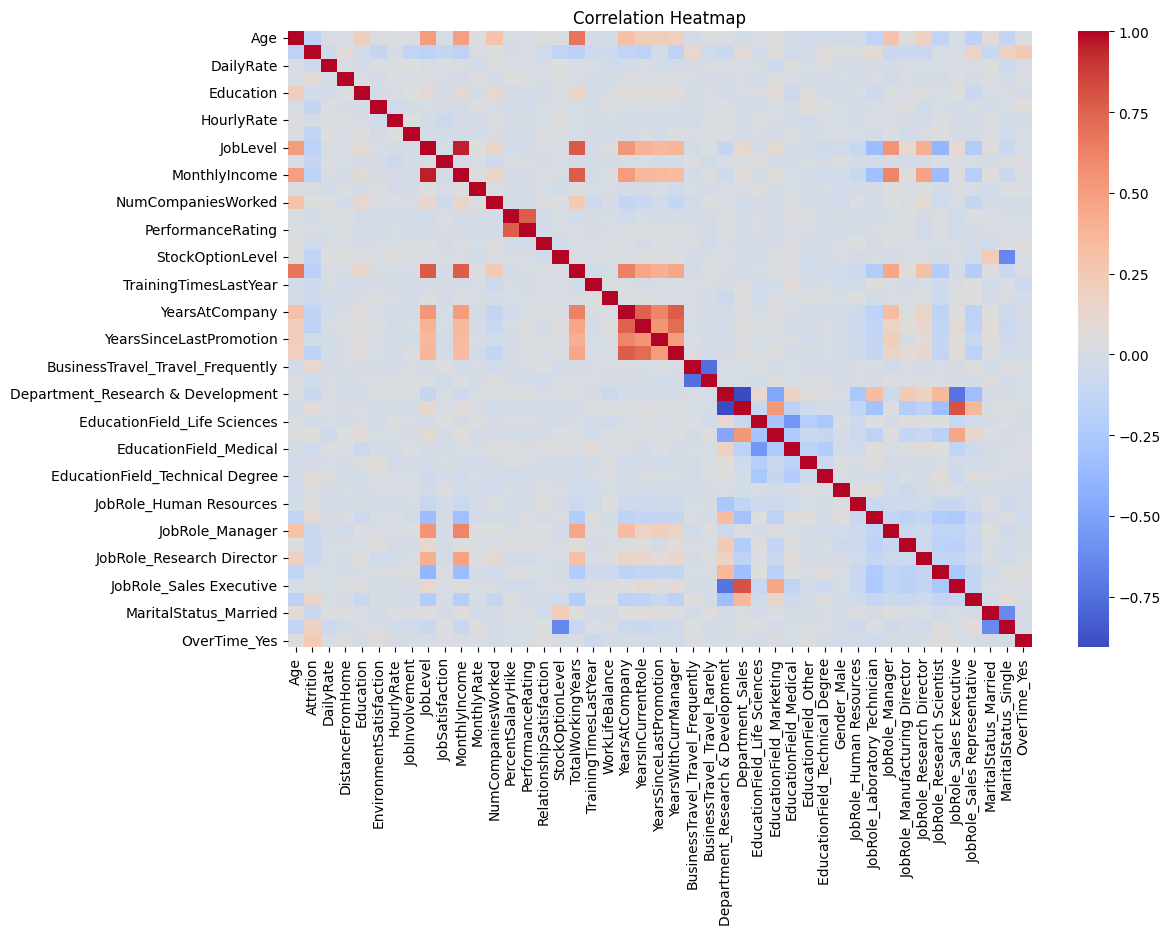

In [8]:
# Predicting Employee Attrition - IBM HR Dataset

# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  # Update path if needed

# 3. Initial Data Exploration
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
print(df.info())
print(df.describe())

# 4. Value Counts for Key Columns
print(df['Attrition'].value_counts())
print(df['JobRole'].value_counts())
print(df['OverTime'].value_counts())

# 5. Drop Unnecessary Columns
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

# 6. Label Encode Target Column
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

# 7. One-Hot Encode Categorical Features
df = pd.get_dummies(df, drop_first=True)

# 8. Feature Scaling
X = df.drop('Attrition', axis=1)
y = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 9. Handle Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 10. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 11. Model Building

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 12. Evaluation

def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

# 13. Feature Importance (Random Forest)
importances = rf.feature_importances_
features = X.columns
importance_df = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df[:10], y=importance_df.index[:10])
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 14. EDA Visualizations

# Attrition Count
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Count')
plt.show()

# Monthly Income vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=pd.concat([pd.DataFrame(X), y], axis=1))
plt.title('Monthly Income vs Attrition')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()
